In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

cleveland = pd.read_csv('processed.cleveland.csv')
cleveland.head(10)

,Age,Sex,CP,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


ANALYZING DATA

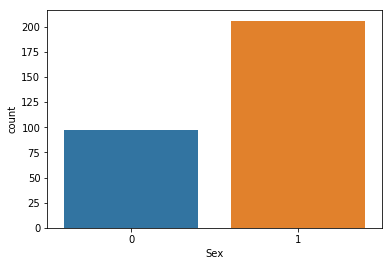

In [8]:
sns.countplot(x = 'Sex', data = cleveland)

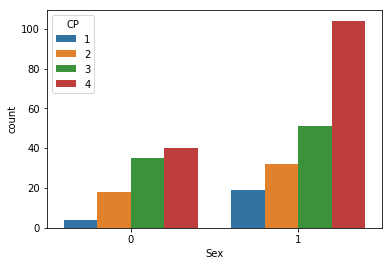

In [12]:
sns.countplot(x = 'Sex',hue = 'CP', data = cleveland)

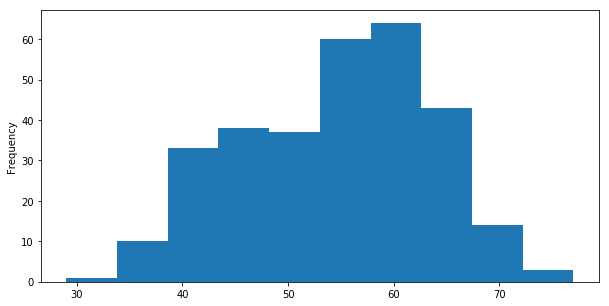

In [22]:
cleveland['Age'].plot.hist(bins = 10, figsize = [10,5])

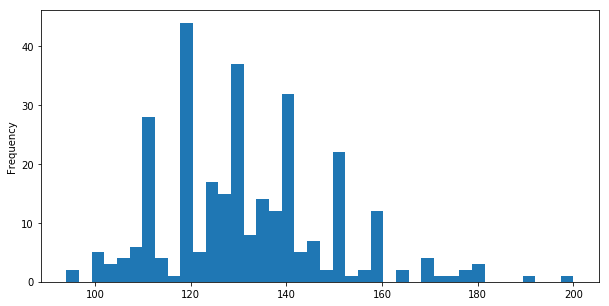

In [29]:
cleveland['trestbps'].plot.hist(bins = 40, figsize = [10,5])

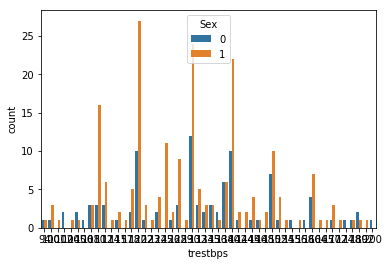

In [33]:
sns.countplot(x = 'trestbps', hue = 'Sex', data = cleveland)

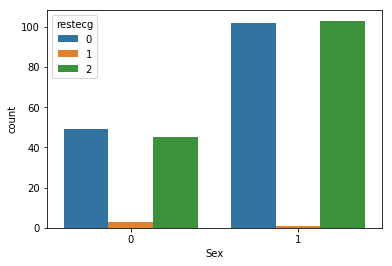

In [35]:
sns.countplot(x = 'Sex', hue = 'restecg', data = cleveland)

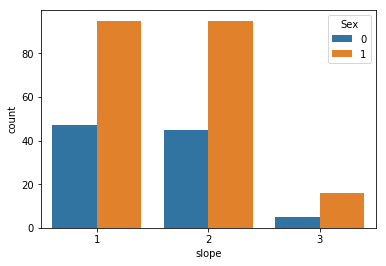

In [36]:
sns.countplot(x = 'slope', hue = 'Sex', data = cleveland)

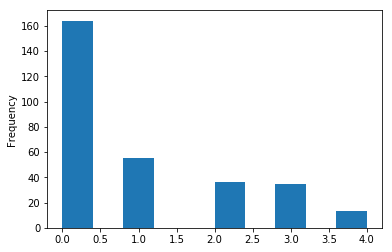

In [44]:
cleveland['num'].plot.hist()

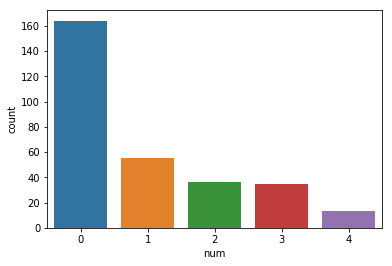

In [45]:
sns.countplot(x = 'num', data = cleveland)

Data Wrangling

In [62]:
cleveland.tail(25).isna().sum(axis = 0)

Age         0
Sex         0
CP          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [66]:
indexnames = cleveland[cleveland['thal'] == '?'].index
cleveland.drop(indexnames, inplace = True)

In [67]:
print(cleveland['thal'])

0      6
1      3
2      7
3      3
4      3
5      3
6      3
7      3
8      7
9      7
10     6
11     3
12     6
13     7
14     7
15     3
16     7
17     3
18     3
19     3
20     3
21     3
22     3
23     7
24     7
25     3
26     3
27     3
28     3
29     7
      ..
273    3
274    3
275    7
276    3
277    3
278    3
279    3
280    7
281    3
282    7
283    3
284    7
285    6
286    6
287    7
288    7
289    3
290    7
291    3
292    6
293    7
294    3
295    3
296    6
297    7
298    7
299    7
300    7
301    3
302    3
Name: thal, Length: 301, dtype: object


In [69]:
indexnames = cleveland[cleveland['ca'] == '?'].index
cleveland.drop(indexnames, inplace = True)

KeyError: 'ca'

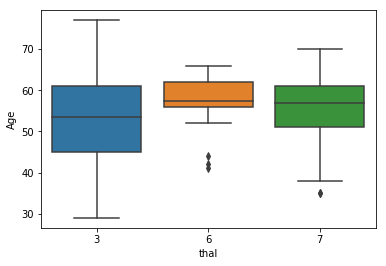

In [72]:
sns.boxplot(x = 'thal',y = 'Age', data = cleveland)

In [73]:
cleveland.dropna(inplace = True)

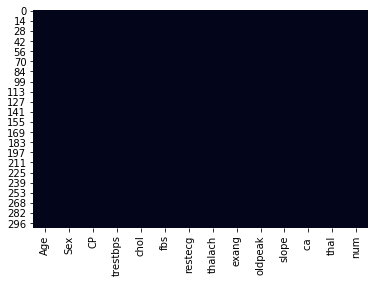

In [76]:
sns.heatmap(cleveland.isnull(),  cbar = False)

In [77]:
num = pd.get_dummies(cleveland['num'])
num.head(5)

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [79]:
cleveland.replace(to_replace = 2, value = 1)

,Age,Sex,CP,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,1,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,1,108,1,1.5,1,3,3,1
2,67,1,4,120,229,0,1,129,1,2.6,1,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,1,130,204,0,1,172,0,1.4,1,0,3,0
5,56,1,1,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,1,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,1,147,0,1.4,1,1,7,1
9,53,1,4,140,203,1,1,155,1,3.1,3,0,7,1


In [83]:
cleveland.replace(to_replace = 3, value = 1, inplace = True)
print(cleveland.head(10)['num'])

0    0
1    2
2    1
3    0
4    0
5    0
6    1
7    0
8    2
9    1
Name: num, dtype: int64


In [84]:
cleveland.replace(to_replace = 2, value = 1, inplace = True)
print(cleveland.head(10)['num'])

0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: num, dtype: int64


In [85]:
cleveland.replace(to_replace = 4, value = 1, inplace = True)
print(cleveland.head(50)['num'])

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    0
26    0
27    0
28    0
29    1
30    0
31    1
32    1
33    0
34    0
35    0
36    1
37    1
38    1
39    0
40    1
41    0
42    0
43    0
44    1
45    1
46    0
47    1
48    0
49    0
Name: num, dtype: int64


In [86]:
print(cleveland['num'])

0      0
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     1
      ..
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    1
281    0
282    1
283    0
284    1
285    1
286    1
287    0
288    0
289    0
290    1
291    0
292    1
293    1
294    1
295    0
296    1
297    1
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 301, dtype: int64


Train Data

In [88]:
X = cleveland.drop('num', axis = 1)
Y = cleveland['num']

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
Algomodel = LogisticRegression()

In [104]:
cleveland.replace(to_replace = '?', value = 0, inplace = True)
print(cleveland.tail(50))

     Age  Sex  CP  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
252   64    1   1       128   263    0        0      105      1      0.2   
253   51    0   1       120   295    0        1      157      0      0.6   
254   43    1   1       115   303    0        0      181      0      1.2   
255   42    0   1       120   209    0        0      173      0      0.0   
256   67    0   1       106   223    0        0      142      0      0.3   
257   76    0   1       140   197    0        1      116      0      1.1   
258   70    1   1       156   245    0        1      143      0      0.0   
259   57    1   1       124   261    0        0      141      0      0.3   
260   44    0   1       118   242    0        0      149      0      0.3   
261   58    0   1       136   319    1        1      152      0      0.0   
262   60    0   1       150   240    0        0      171      0      0.9   
263   44    1   1       120   226    0        0      169      0      0.0   
264   61    

In [106]:
print(cleveland)

     Age  Sex  CP  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        1      150      0      2.3   
1     67    1   1       160   286    0        1      108      1      1.5   
2     67    1   1       120   229    0        1      129      1      2.6   
3     37    1   1       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        1      172      0      1.4   
5     56    1   1       120   236    0        0      178      0      0.8   
6     62    0   1       140   268    0        1      160      0      3.6   
7     57    0   1       120   354    0        0      163      1      0.6   
8     63    1   1       130   254    0        1      147      0      1.4   
9     53    1   1       140   203    1        1      155      1      3.1   
10    57    1   1       140   192    0        0      148      0      0.4   
11    56    0   1       140   294    0        1      153      0      1.3   
12    56    

In [110]:
cleveland = pd.read_csv("processed.cleveland.csv")

In [115]:
for col in cleveland.columns:
    print(col)

Age
Sex
CP
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca 
thal
num


In [125]:
Algomodel.fit(X_train, Y_train)


ValueError: could not convert string to float: '?'

KeyError: 'ca'